# Importing Libraries

In [2]:
# calling the required libraries
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calling the Dataset

In [3]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('C:/Users/Neha/Desktop/Artificial Intelligence Course work/4) Data Science and decision making/data for project/weatherdata_for_students/*colchester*.csv')

# Create an empty dataframe to store the combined data
data = pd.DataFrame()

# Loop through each CSV file and append its contents to the dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    skip_row = 1 if df.iloc[0,0]=='datetime' else 0
    data = pd.concat([data, pd.read_csv(csv_file,skiprows=skip_row)], ignore_index=True)

# Print the combined dataframe
print(data)

                   datetime  temp  dew  humidity  precip  precipprob  \
0       2000-01-01T00:00:00   5.9  5.7     98.63     0.0         0.0   
1       2000-01-01T01:00:00   6.4  5.8     96.12     0.0         0.0   
2       2000-01-01T02:00:00   6.6  6.4     98.31     0.0         0.0   
3       2000-01-01T03:00:00   7.2  6.5     95.92     0.0         0.0   
4       2000-01-01T04:00:00   7.2  6.6     96.38     0.0         0.0   
...                     ...   ...  ...       ...     ...         ...   
188019  2024-01-05T05:00:00   5.2  4.1     92.17     NaN         0.0   
188020  2024-01-05T06:00:00   5.2  4.0     92.40     NaN         0.0   
188021  2024-01-05T07:00:00   5.5  4.0     89.64     NaN         0.0   
188022  2024-01-05T08:00:00   5.8  4.1     88.93     NaN         0.0   
188023  2024-01-05T09:00:00   6.0  4.2     88.83     NaN         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0             NaN   NaN        NaN        9.4    210.0     

In [4]:
data.head(10)

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
0,2000-01-01T00:00:00,5.9,5.7,98.63,0.000,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
1,2000-01-01T01:00:00,6.4,5.8,96.12,0.000,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2,2000-01-01T02:00:00,6.6,6.4,98.31,0.000,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
3,2000-01-01T03:00:00,7.2,6.5,95.92,0.000,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
4,2000-01-01T04:00:00,7.2,6.6,96.38,0.000,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN
5,2000-01-01T05:00:00,7.5,6.8,95.85,0.000,0.0,NaN,NaN,NaN,14.1,270.0,1021.3,100.0,NaN,NaN,NaN
6,2000-01-01T06:00:00,8.0,7.3,95.37,0.044,100.0,rain,NaN,NaN,11.9,290.0,1021.7,100.0,NaN,NaN,NaN
7,2000-01-01T07:00:00,8.0,7.3,95.22,0.000,0.0,NaN,NaN,NaN,10.6,300.0,1022.6,100.0,NaN,NaN,NaN
8,2000-01-01T08:00:00,7.6,7.2,97.35,0.000,0.0,NaN,NaN,NaN,12.3,308.0,1023.5,90.0,NaN,NaN,NaN
9,2000-01-01T09:00:00,7.5,6.8,95.50,0.000,0.0,NaN,NaN,NaN,13.3,326.0,1024.4,90.0,NaN,NaN,NaN


# Exploratory Data Analysis

In [5]:
# Convert 'datetime' column to datetime data type
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
# Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                temp            dew       humidity         precip  \
count  187606.000000  187600.000000  187602.000000  187437.000000   
mean       10.503048       7.190720      81.596979       0.067773   
std         6.004301       4.956358      14.085087       0.623144   
min        -9.600000     -10.800000      22.430000       0.000000   
25%         6.100000       3.600000      73.490000       0.000000   
50%        10.300000       7.400000      85.480000       0.000000   
75%        14.700000      10.900000      92.680000       0.000000   
max        35.000000      21.500000     100.000000      84.324000   

          precipprob           snow      snowdepth      windspeed  \
count  187590.000000  186478.000000  186429.000000  187627.000000   
mean       10.276578       0.001008       0.062193      15.998126   
std        30.357300       0.043173       0.602604       7.916611   
min         0.000000       0.000000       0.000000       0.000000   
25%         0

# Data Visualization

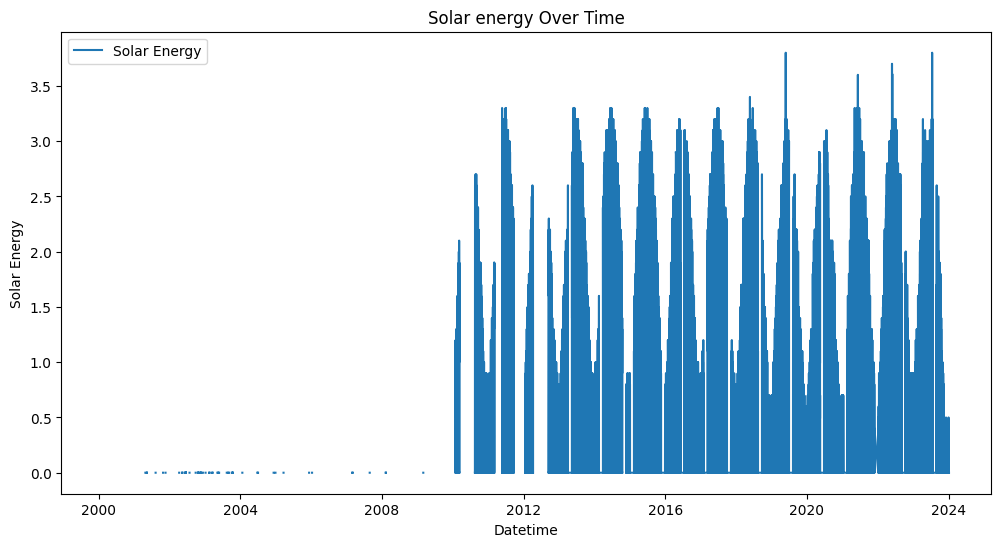

In [7]:
 # Time Series Plots
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['solarenergy'], label='Solar Energy')
plt.xlabel('Datetime')
plt.ylabel('Solar Energy')
plt.title('Solar energy Over Time')
plt.legend()
plt.show()

We have clear observation of the periodicity of each year's solar energy distrubution. We have a lot of missing values which has to be treated

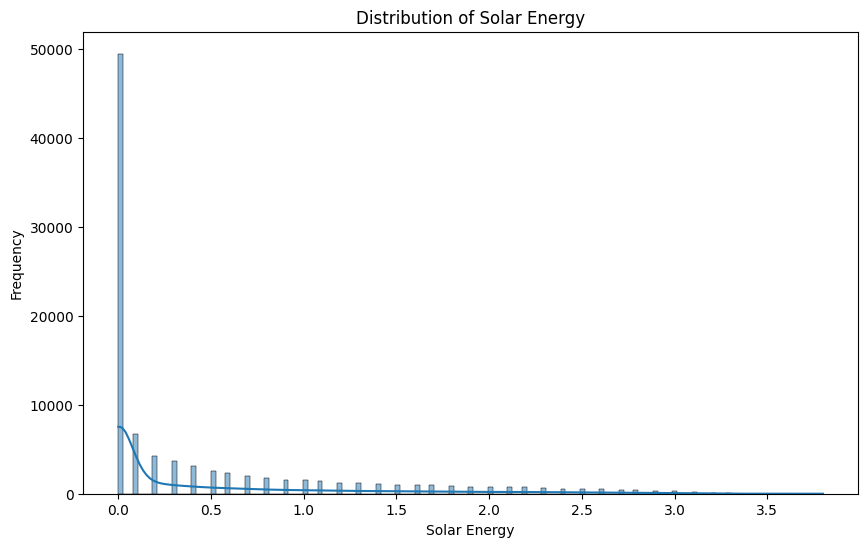

In [8]:
# Distribution Plots
plt.figure(figsize=(10, 6))
sns.histplot(data['solarenergy'], kde=True)
plt.xlabel('Solar Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Energy')
plt.show()

we are visualizing the histogram with kernal density function to visualize the distribution of the data while also having an estimate of its underlying probability density function.

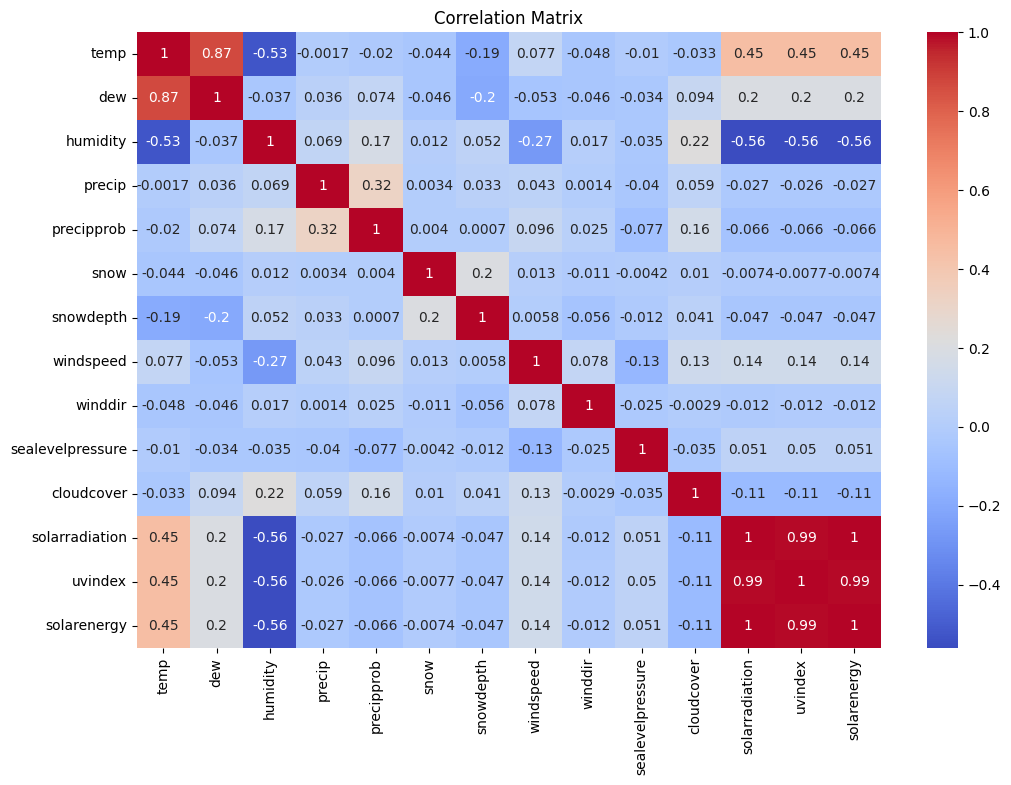

In [9]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This correlation plot visually displays the strength and direction of linear relationships between pairs of variables. Strong positive correlations are indicated by values close to 1, while strong negative correlations are indicated by values close to -1. Values near 0 suggest weak or no linear relationship. Patterns in the correlation plot can reveal potential dependencies and guide feature selection or model interpretation in data analysis tasks.

In [10]:
# List of columns to remove because they are not useful to draw insights into the project assumptions and deliverables
columns_to_remove = ['dew', 'precip', 'precipprob','preciptype', 'snow', 'snowdepth','windspeed', 'winddir', 'sealevelpressure','cloudcover','uvindex', 'solarradiation']

# Drop the specified columns
data1 = data.drop(columns=columns_to_remove)

# Now the dataframe contains only the relevant columns
data1.columns

Index(['datetime', 'temp', 'humidity', 'solarenergy'], dtype='object')

In [11]:
# Identifying the Missing Values 
missing_values = data1.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
datetime           0
temp             418
humidity         422
solarenergy    93116
dtype: int64


# Data Preprocessing

In [12]:
# Let's say we want to create extra columns: month, day of the week, and hour to get detailed overview of the data

# Extracting Time Features
data1['hour'] = data1['datetime'].dt.hour
data1['day_of_week'] = data1['datetime'].dt.dayofweek
data1['month'] = data1['datetime'].dt.month

In [18]:
# Let's make the date column the index of the dataframe for easier slicing
data1.set_index('datetime', inplace=True) # note we can only run this once, as it will delete the 'date' column.
data1.head()

,temp,humidity,solarenergy,hour,day_of_week,month
datetime,,,,,,
2000-01-01 00:00:00,5.9,98.63,0.439357,0,5,1
2000-01-01 01:00:00,6.4,96.12,0.439357,1,5,1
2000-01-01 02:00:00,6.6,98.31,0.439357,2,5,1
2000-01-01 03:00:00,7.2,95.92,0.439357,3,5,1
2000-01-01 04:00:00,7.2,96.38,0.439357,4,5,1


In [19]:
# Handling Missing Values
data = ['temp', 'humidity', 'solarenergy']
data1[data] = data1[data].interpolate(method='time')

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188024 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temp         188024 non-null  float64
 1   humidity     188024 non-null  float64
 2   solarenergy  188024 non-null  float64
 3   hour         188024 non-null  int64  
 4   day_of_week  188024 non-null  int64  
 5   month        188024 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 10.0 MB


I have used the interpolation method with respect to time to deal with missing values( since it is a time series data) but as we can observe the attribute solar energy still has missing values, so we went with another method that is imputation with mean. 

In [21]:
data_to_impute = ['temp', 'humidity','solarenergy']
data1[data_to_impute] = data1[data_to_impute].fillna(data1[data_to_impute].mean())
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188024 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temp         188024 non-null  float64
 1   humidity     188024 non-null  float64
 2   solarenergy  188024 non-null  float64
 3   hour         188024 non-null  int64  
 4   day_of_week  188024 non-null  int64  
 5   month        188024 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 10.0 MB


In [22]:
# Time series decomposition
# Let's downsample our timeseries first: average solar energy per month
data_ds = data1['solarenergy'].resample('M').mean().ffill().to_frame()  # one value per month
data_ds

,solarenergy
datetime,
2000-01-31,0.439357
2000-02-29,0.438095
2000-03-31,0.437583
2000-04-30,0.438747
2000-05-31,0.436995
...,...
2023-09-30,0.422878
2023-10-31,0.226280
2023-11-30,0.105934


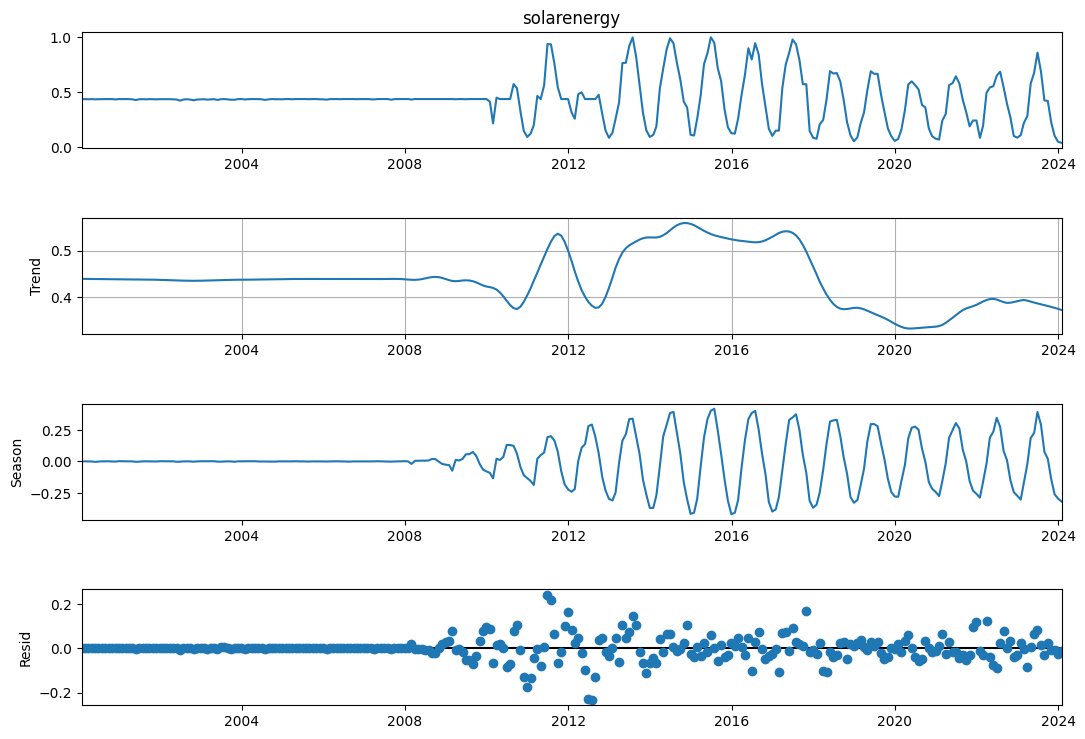

In [23]:
# decomposition graph to study the trend, seasonality anf residual of the input attribute
decomposition = STL(data_ds['solarenergy']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid() # so we can check a bit better if there's a trend or not
plt.savefig('./avg_solarenergy_decomp.pdf', dpi=1000)

TREND: There isn't any clear trend in this case the values remain mostly static across time, but they do seem slightly higher on the right-hand side than on the left.

SEASONALITY: There is a clear seasonal component that increased seasonally from 2008.

RESIDUAL: we can see the distribution of data where the residuals are above 2.5 degrees and symmetrically distributed around zero, that's the noise we wont be able to predict

In [24]:
# Defining Target Variables
data1['energy_surplus_next_day'] = data1['solarenergy'].shift(-24)
data1['energy_surplus'] = data1['energy_surplus_next_day'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
# Reset the index to turn the datetime index back into a column for modelling with time series algorithms
data1.reset_index(inplace=True)

# Saving the exploration and preprocessed data to CSV according to the requirement

In [27]:
data1.to_csv("colchester_exploration_preprocessed_data.csv", index=False)

In [28]:
# defining the Data for input features and target variables
X = data1.drop([ 'hour', 'day_of_week', 'month', 'energy_surplus_next_day', 'energy_surplus'], axis=1)
y = data1['energy_surplus']

For X thats the input features we are considering temperature, humidity and solar energy, 
For y we are considering energy surplus as our target varible  

In [29]:
# Display the preprocessed dataset
print("Preprocessed Data:")
print(X.head())
print(y.head())

Preprocessed Data:
             datetime  temp  humidity  solarenergy
0 2000-01-01 00:00:00   5.9     98.63     0.439357
1 2000-01-01 01:00:00   6.4     96.12     0.439357
2 2000-01-01 02:00:00   6.6     98.31     0.439357
3 2000-01-01 03:00:00   7.2     95.92     0.439357
4 2000-01-01 04:00:00   7.2     96.38     0.439357
0    1
1    1
2    1
3    1
4    1
Name: energy_surplus, dtype: int64


# Data Splitting

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Assumptions

In [32]:
# Calculating total solar surplus energy for the year
total_surplus_energy_yearly = data1['solarenergy'].sum()
print("The total solar energy: ",total_surplus_energy_yearly)

# Assuming the number of participating households
total_households_in_city = 10000  # Example: Total number of households in the colchester city 
percentage_participation = 0.1  # Example: 10% of households in the city participate
participating_households = int(total_households_in_city * percentage_participation)

# Calculate the number of solar panels per participating household
solar_panels_per_household = 2  # Example: Each participating household has 2 solar panels

# Calculate the total number of solar panels
n_solar_panels = participating_households * solar_panels_per_household

# Calculate total capacity of all solar panels
capacity_per_solar_panel = 10  # Example: Capacity of each solar panel in kilowatts (kW)
total_capacity_solar = n_solar_panels * capacity_per_solar_panel

# Set a threshold for surplus energy based on a percentage of total capacity
threshold_percentage = 0.2  # 20% surplus energy considered significant
threshold_solar = total_capacity_solar * threshold_percentage

# Calculate surplus energy provided per hour
surplus_energy_per_hour = total_surplus_energy_yearly / (365 * 24)

print("Surplus energy provided per hour to a household:", surplus_energy_per_hour, "kWh")
print("Number of participating households in the city:", participating_households)
print("Number of solar panels installed:", n_solar_panels)
print("Total capacity of solar panels (kW):", total_capacity_solar)
print("Threshold for surplus energy (kWh):", threshold_solar)

The total solar energy:  82609.67214565686
Surplus energy provided per hour to a household: 9.430327870508775 kWh
Number of participating households in the city: 1000
Number of solar panels installed: 2000
Total capacity of solar panels (kW): 20000
Threshold for surplus energy (kWh): 4000.0


In [36]:
data = pd.DataFrame(data1)
def determine_surplus_energy(row):
    if row['solarenergy'] > threshold_solar:
        return True
    else:
        return False

# Apply the function to each row in the DataFrame
data['surplus_energy'] = data.apply(determine_surplus_energy, axis=1)
# Print the DataFrame with the surplus energy column
print(data[['datetime', 'solarenergy', 'surplus_energy']].head())


             datetime  solarenergy  surplus_energy
0 2000-01-01 00:00:00     0.439357           False
1 2000-01-01 01:00:00     0.439357           False
2 2000-01-01 02:00:00     0.439357           False
3 2000-01-01 03:00:00     0.439357           False
4 2000-01-01 04:00:00     0.439357           False


we are just printing out if we have surplus energy that the company can provide or not